# K Nearest-Neighbors KNN

- Author  : Amir Malek Esfandiari
- Contact : [Github Page](https://github.com/AmirES1998)

![IMAGES](./IMAGES/self.jpg)


## Introduction

In this chapter we discuss some simple and essentially model-free methods
for classification and pattern recognition. Because they are highly unstruc-
tured, they typically are not useful for understanding the nature of the
relationship between the features and class outcome. However, as black box
prediction engines, they can be very effective, and are often among the best
performers in real data problems. The nearest-neighbor technique can also
be used in regression; this was touched on in Chapter 2 and works reason-
ably well for low-dimensional problems. However, with high-dimensional
features, the bias–variance tradeoff does not work as favorably for nearest-
neighbor regression as it does for classification.


## Prototype Methods

Throughout this chapter, our training data consists of the N pairs ($x_1$,$g_1$),
..., ($x_n$,$g_N$ ) where gi is a class label taking values in {1,2,...,K}. Pro-totype methods represent the training data by a set of points in feature
space. These prototypes are typically not examples from the training sam-
ple, except in the case of 1-nearest-neighbor classification discussed later.
Each prototype has an associated class label, and classification of a query
point $x$ is made to the class of the closest prototype. “Closest” is usually
defined by Euclidean distance in the feature space, after each feature has been standardized to have overall mean 0 and variance 1 in the training
sample. Euclidean distance is appropriate for quantitative features.

These methods can be very effective if the prototypes are well positioned
to capture the distribution of each class. Irregular class boundaries can be
represented, with enough prototypes in the right places in feature space.
The main challenge is to figure out how many prototypes to use and where
to put them. Methods differ according to the number and way in which
prototypes are selected.


## K-means Clustering

K-means clustering is a method for finding clusters and cluster centers in a
set of unlabeled data. One chooses the desired number of cluster centers, say
R, and the K-means procedure iteratively moves the centers to minimize
the total within cluster variance. Given an initial set of centers, the K-
means algorithm alternates the two steps:

- for each center we identify the subset of training points (its cluster)
    that is closer to it than any other center;

- the means of each feature for the data points in each cluster are computed, and this mean vector becomes the new center for that cluster

These two steps are iterated until convergence.Typically the initial centers are R randomly chosen observations from the training data

### K-means clustring for labeled data

To use K-means clustering for classification of labeled data, the steps are:

- apply K-means clustering to the training data in each class separately, using R prototypes per class;

- assign a class label to each of the $K$ × $R$ prototypes;

- classify a new feature $x$ to the class of the closest prototype.


## Learning Vector Quantization

In this technique due to Kohonen (1989), prototypes are placed strategically with respect to the decision boundaries in an ad-hoc way.
The idea is that the training points attract prototypes of the correct class, and repel other prototypes. When the iterations settle down, prototypes should be close to the training points in their class. The learning rate ǫ is decreased to zero with each iteration . 

   #### algorithm

1. Choose \( R \) initial prototypes for each class: \( m_1^{(k)}, m_2^{(k)}, \dots, m_R^{(k)} \),
   \( k = 1,2,\dots,K \), for example, by sampling \( R \) training points at random
   from each class.


2. Sample a training point \( x_i \) randomly (with replacement), and let \( (j, k) \)
   index the closest prototype \( m_j^{(k)} \) to \( x_i \).
   
   (a) If \( g_i = k \) (i.e., they are in the same class), move the prototype
       towards the training point:
    
   $$
      m_j^{(k)} \leftarrow m_j^{(k)} + \epsilon (x_i - m_j^{(k)}),
   $$     
      
      where $\epsilon$ is the learning rate.
      
   


         
   \
   (b) If \( g_i \neq k \) (i.e., they are in different classes), move the prototype
       away from the training point:
       
      $$
      m_j^{(k)} \leftarrow m_j^{(k)} - \epsilon (x_i - m_j^{(k)}).
      $$

3. Repeat step 2, decreasing the learning rate \( \epsilon \) with each iteration towards zero.

 
**drawback**

A drawback of learning vector quantization methods is the fact that they are defined by algorithms, rather than optimization of some fixed criteria; this makes it difficult to understand their properties.



## k-Nearest-Neighbor Classifiers
These classifiers are memory-based, and require no model to be fit. Given a query point $x_0$, we find the k training points $x_(r)$,r = 1,...,k closest in distance to $x_0$, and then classify using majority vote among the $k$ neighbors


<center>

![IMAGES](./IMAGES/14.png)

**FIGURE 2.** The upper panel shows the K-means classifier applied to the
mixture data example. The decision boundary is piecewise linear. The lower panel
shows a Gaussian mixture model with a common covariance for all component
Gaussians. The EM algorithm for the mixture model was started at the K-means
solution. The broken purple curve in the background is the Bayes decision
boundary.


</center>




Ties are broken at random. For simplicity we will assume that the features
are real-valued, and we use Euclidean distance in feature space:

$$ d_i = {|| x_i − x_0 ||} \,\,\,\,\,\, (1) $$

Typically we first standardize each of the features to have mean zero and variance 1, since it is possible that they are measured in different unit.

Despite its simplicity, k-nearest-neighbors has been successful in a large number of classification problems, including handwritten digits, satellite image scenes and EKG patterns. It is often successful where each class has many possible prototypes, and the decision boundary is very irregular.

**Figure 3 (upper panel)** shows the decision boundary of a 15-nearest-neighbor classifier applied to the three-class simulated data. The decision boundary is fairly smooth compared to the lower panel, where a 1-nearest- neighbor classifier was used. There is a close relationship between nearest- neighbor and prototype methods: in 1-nearest-neighbor classification, each training point is a prototype.


**Figure 4 shows** the training, test and tenfold cross-validation errors as a function of the neighborhood size, for the two-class mixture problem.Since the tenfold CV errors are averages of ten numbers, we can estimate a standard error.


Because it uses only the training point closest to the query point, the bias of the 1-nearest-neighbor estimate is often low, but the variance is high. A famous result of Cover and Hart (1967) shows that asymptotically the error rate of the 1-nearest-neighbor classifier is never more than twice the Bayes rate. The rough idea of the proof is as follows (using squared-error loss). We assume that the query point coincides with one of the training points, so that the bias is zero. This is true asymptotically if the dimension of the feature space is fixed and the training data fills up the space in a dense fashion. Then the error of the Bayes rule is just the variance of a Bernoulli random variate (the target at the query point), while the error of 1-nearest-neighbor rule is twice the variance of a Bernoulli random variate,one contribution each for the training and query targets.


<center>

![IMAGES](./IMAGES/15.png)


**FIGURE 3.** k-nearest-neighbor classifiers applied to the simulation data of Figure 1. The broken purple curve in the background is the Bayes decision boundary

</center>




<center>

![IMAGES](./IMAGES/16.png)


**FIGURE 4.** k-nearest-neighbors on the two-class mixture data. The upper panel shows the misclassification errors as a function of neighborhood size. Standard error bars are included for 10-fold cross validation. The lower panel shows the decision boundary for 7-nearest-neighbors, which appears to be optimal for minimizing test error. The broken purple curve in the background is the Bayes decision boundary

</center>

We now give more detail for misclassification loss. At $x$ let $k^∗$ be the dominant class, and $p_k(x)$ the true conditional probability for class $k$. Then

$$
Bayes error = 1 − p_k^*(x)    \,\,\,\, (2)  
$$
$$
1-nearest-neighbor error = \sum_{k=1}^{K} p_k{(x)} (1 − p_k{(x)}), \,\,\,\,\, (3)
$$
$$
≥ 1 − p_{(k^∗)}(x). \,\,\,\,\,\,\,\,  (4)
$$


The asymptotic 1-nearest-neighbor error rate is that of a random rule; we pick both the classification and the test point at random with probabilities $p_k(x)$, $k$ = 1,...,$K$. For $K$ = 2 the 1-nearest-neighbor error rate is $ 2p_{k^∗}(x)(1 − p_{k^∗}(x)) ≤ 2(1 − p_{k^∗}(x))$ (twice the Bayes error rate). More generally, one can show (Exercise 13.3)
$$
\sum_{k=1}^{K} p_k(x)(1 − p_k(x)) ≤ \,\, 2(1 − p_{k^∗}(x)) − \frac{K}{K −1} (1 − p_{k^∗}(x))^2.  \,\,\,\,\, (5)
$$

Many additional results of this kind have been derived; Ripley (1996) summarizes a number of them.
   This result can provide a rough idea about the best performance that is possible in a given problem. For example, if the 1-nearest-neighbor rule has a 10% error rate, then asymptotically the Bayes error rate is at least 5%. The kicker here is the asymptotic part, which assumes the bias of the nearest-neighbor rule is zero. In real problems the bias can be substantial. The adaptive nearest-neighbor rules, described later in this chapter, are an attempt to alleviate this bias. For simple nearest-neighbors, the bias and variance characteristics can dictate the optimal number of near neighbors for a given problem. This is illustrated in the next example.






### Example: A Comparative Study


We tested the nearest-neighbors, K-means and LVQ classifiers on two simulated problems. There are 10 independent features $X_j$ , each uniformly distributed on [0,1]. The two-class 0-1 target variable is defined as follows:


<!-- $$
Y = I \left( X_1 > \frac{1}{2} \right); \,\,\,\,\, problem 1: "easy" , \quad\quad (6)
$$
$$
Y = I \left( \text{sign} \left\{ \prod_{j=1}^3 \left( X_j - \frac{1}{2} \right) \right\} > 0 \right); \,\,\,\, problem 2: "difficult."
$$ -->

\[
\begin{array}{rl}
Y = I \left( X_1 > \frac{1}{2} \right) & \text{; problem1: "easy,"} \\
& \\
Y = I \left( \text{sign} \left\{ \prod_{j=1}^3 \left( X_j - \frac{1}{2} \right) \right\} > 0 \right) & \text{; problem2: "difficult."}
\end{array}
\qquad\qquad (6)
\]

Hence in the first problem the two classes are separated by the hyperplane $X1 = 1/2;$ in the second problem, the two classes form a checkerboard pattern in the hypercube defined by the first three features. The Bayes error rate is zero in both problems. There were 100 training and 1000 test observations.

**Figure 5** shows the mean and standard error of the misclassification error for nearest-neighbors, K-means and LVQ over ten realizations, as the tuning parameters are varied. We see that K-means and LVQ give nearly identical results. For the best choices of their tuning parameters, K-means and LVQ outperform nearest-neighbors for the first problem, and they perform similarly for the second problem. Notice that the best value of each tuning parameter is clearly situation dependent. For example 25-nearest-neighbors outperforms 1-nearest-neighbor by a factor of 70% in the first problem, while 1-nearest-neighbor is best in the second problem by a
factor of 18% . 

<center>

![IMAGES](./IMAGES/17.png)


**FIGURE 5.** Mean ± one standard error of misclassification error for nearest-neighbors, K-means (blue) and LVQ (red) over ten realizations for two simulated problems: “easy” and “difficult,” described in the text.


</center>



## Adaptive Nearest-Neighbor Methods

When nearest-neighbor classification is carried out in a high-dimensional feature space, the nearest neighbors of a point can be very far away, causing bias and degrading the performance of the rule.

To quantify this, consider \( N \) data points uniformly distributed in the unit cube \(\left[ -\frac{1}{2}, \frac{1}{2} \right]^p\). Let \( R \) be the radius of a 1-nearest-neighborhood centered at the origin. Then

\[
\text{median}(R) = v_p^{-\frac{1}{p}} \left( 1 - \frac{1}{2}^{\frac{1}{N}} \right)^{\frac{1}{p}}, \tag{13.7}
\]

where \( v_p r^p \) is the volume of the sphere of radius \( r \) in \( p \) dimensions. Figure 13.12 shows the median radius for various training sample sizes and dimensions. We see that median radius quickly approaches 0.5, the distance to the edge of the cube.

What can be done about this problem? Consider the two-class situation in Figure 13.13. There are two features, and a nearest-neighborhood at a query point is depicted by the circular region. Implicit in near-neighbor classification is the assumption that the class probabilities are roughly constant in the neighborhood, and hence simple averages give good estimates. However, in this example the class probabilities vary only in the horizontal direction. If we knew this, we would stretch the neighborhood in the vertical direction, as shown by the tall rectangular region. This will reduce the bias of our estimate and leave the variance the same.

In general, this calls for adapting the metric used in nearest-neighbor classification, so that the resulting neighborhoods stretch out in directions for which the class probabilities don't change much. In high-dimensional feature space, the class probabilities might change only a low-dimensional subspace and hence there can be considerable advantage to adapting the metric.

<center>

![IMAGES](./IMAGES/18.png)


**FIGURE 6.** Median radius of a 1-nearest-neighborhood, for uniform data
with N observations in p dimensions

</center>



<center>

![IMAGES](./IMAGES/19.png)


**FIGURE 7.** The points are uniform in the cube, with the vertical line separating class red and green. The vertical strip denotes the 5-nearest-neighbor region using only the horizontal coordinate to find the nearest-neighbors for the target point (solid dot). The sphere shows the 5-nearest-neighbor region using both coordinates, and we see in this case it has extended into the class-red region (and is dominated by the wrong class in this instance).



</center>


# Adaptive Nearest-Neighbor (DANN) Method

Friedman (1994a) proposed a method in which rectangular neighborhoods are found adaptively by successively varying away sizes of a box containing the training data. Here we describe the discriminant adaptive nearest-neighbor (DANN) rule of Hastie and Tibshirani (1996a). Earlier, related proposals appear in Short and Fukunaga (1981) and Myles and Hand (1990).

At each query point a neighborhood of say 50 points is formed, and the class distribution among the points is used to decide how to deform the neighborhood—that is, to adapt the metric. The adapted metric is then used in a nearest-neighbor rule at the query point. Thus at each query point a potential different metric is used.

In Figure 13.13 it is clear that the neighborhood should be stretched in the direction orthogonal to line joining the class centroids. This direction also coincides with the linear discriminant boundary, and is the direction in which the class probabilities change the least. In general this direction of maximum change will not be orthogonal to the line joining the class centroids (see Figure 4.9 on page 116). Assuming a local discriminant model, the information contained in the local within- and between-class covariance matrices is all that is needed to determine the optimal shape of the neighborhood.

The discriminant adaptive nearest-neighbor (DANN) metric at a query point $x_0$ is defined by:

$$D(x, x_0) = (x - x_0)^T \Sigma (x - x_0),$$

where

$$\Sigma = \mathbf{W}^{-1/2}[\mathbf{W}^{-1/2}\mathbf{B}\mathbf{W}^{-1/2} + \epsilon\mathbf{I}]\mathbf{W}^{-1/2}$$
$$= \mathbf{W}^{-1/2}[\mathbf{B}^* + \epsilon\mathbf{I}]\mathbf{W}^{-1/2}.$$

Here $\mathbf{W}$ is the pooled within-class covariance matrix $\sum_{k=1}^K \pi_k\mathbf{W}_k$ and $\mathbf{B}$ is the between class covariance matrix $\sum_{k=1}^K \pi_k(\bar{x}_k - \bar{x})(\bar{x}_k - \bar{x})^T$, with $\mathbf{W}$ and $\mathbf{B}$ computed using only the 50 nearest neighbors around $x_0$. After computation of the metric, it is used in a nearest-neighbor rule at $x_0$.

This complicated formula is actually quite simple in its operation. It first spheres the data with respect to $\mathbf{W}$, and then stretches the neighborhood in the zero-eigenvalue directions of $\mathbf{B}^*$ (the between-matrix for the sphered data). This makes sense, since locally the observed class means do not differ in these directions. The $\epsilon$ parameter rounds the neighborhood, from an infinite strip to an ellipsoid, to avoid using points far away from the query point. The value of $\epsilon = 1$ seems to work well in general. Figure 13.14 shows the resulting neighborhoods for a problem where the classes form two concentric circles. Notice how the neighborhoods stretch out orthogonally to the decision boundaries when both classes are present in the neighborhood. In the pure regions with only one class, the neighborhoods remain circular.



<center>

![IMAGES](./IMAGES/20.png)


**FIGURE 8.** Neighborhoods found by the DANN procedure, at various query points (centers of the crosses). There are two classes in the data, with one class surrounding the other. 50 nearest-neighbors were used to estimate the local metrics. Shown are the resulting metrics used to form 15-nearest-neighborhoods.



</center>




### Example
##### Two-Class Data Experiment in Ten Dimensions

Here we generate two-class data in ten dimensions, analogous to the two-dimensional example of Figure 8. All ten predictors in class 1 are independent standard normal, conditioned on the squared radius being greater than 22.4 and less than 40, while the predictors in class 2 are independent standard normal without the restriction. There are 250 observations in each class. Hence the first class almost completely surrounds the second class in the full ten-dimensional space.

In this example there are no pure noise variables, the kind that a nearest-neighbor subset selection rule might be able to weed out. At any given point in the feature space, the class discrimination occurs along only one direction. However, this direction changes as we move across the feature space and all variables are important somewhere in the space.

Figure 13.15 shows boxplots of the test error rates over ten realizations, for standard 5-nearest-neighbors, LVQ, and discriminant adaptive 5-nearest-neighbors. We used 50 prototypes per class for LVQ, to make it comparable to 5 nearest-neighbors (since 250/5 = 50). The adaptive metric significantly reduces the error rate, compared to LVQ or standard nearest-neighbors.


<center>

![IMAGES](./IMAGES/21.png)


**FIGURE 9.** Ten-dimensional simulated example: boxplots of the test error rates over ten realizations, for standard 5-nearest-neighbors, LVQ with 50 centers, and discriminant-adaptive 5-nearest-neighbors



</center>



## Global Dimension Reduction for Nearest-Neighbors

The discriminant-adaptive nearest-neighbor method carries out local dimension reduction—that is, dimension reduction separately at each query point. In many problems we can also benefit from global dimension reduction, that is, apply a nearest-neighbor rule in some optimally chosen subspace of the original feature space. For example, suppose that the two classes form two nested spheres in four dimensions of feature space, and there are an additional six noise features whose distribution is independent of class. Then we would like to discover the important four-dimensional subspace, and carry out nearest-neighbor classification in that reduced subspace. Hastie and Tibshirani (1996a) discuss a variation of the discriminant-adaptive nearest-neighbor method for this purpose. At each training point $x_i$, the between-centroids sum of squares matrix $\mathbf{B}_i$ is computed, and then these matrices are averaged over all training points:

$$\bar{\mathbf{B}} = \frac{1}{N} \sum_{i=1}^N \mathbf{B}_i. \tag{13.10}$$

Let $e_1, e_2, \ldots, e_p$ be the eigenvectors of the matrix $\bar{\mathbf{B}}$, ordered from largest to smallest eigenvalue $\theta_k$. Then these eigenvectors span the optimal subspaces for global subspace reduction. The derivation is based on the fact that the best rank-$L$ approximation to $\bar{\mathbf{B}}$, $\bar{\mathbf{B}}_{[L]} = \sum_{\ell=1}^L \theta_\ell e_\ell e_\ell^T$, solves the least squares problem

$$\min_{\text{rank}(\mathbf{M})=L} \sum_{i=1}^N \text{trace}[(\mathbf{B}_i - \mathbf{M})^2]. \tag{13.11}$$

Since each $\mathbf{B}_i$ contains information on (a) the local discriminant subspace, and (b) the strength of discrimination in that subspace, (13.11) can be seen as a way of finding the best approximating subspace of dimension $L$ to a series of $N$ subspaces by weighted least squares.

In the four-dimensional sphere example mentioned above and examined in Hastie and Tibshirani (1996a), four of the eigenvalues $\theta_\ell$ turn out to be large (having eigenvectors nearly spanning the interesting subspace), and the remaining six are near zero. Operationally, we project the data into the leading four-dimensional subspace, and then carry out nearest neighbor classification. In the satellite image classification example in Section 13.3.2, the technique labeled DANN in Figure 13.8 used 5-nearest-neighbors in a globally reduced subspace. There are also connections of this technique with the *sliced inverse regression* proposal of Duan and Li (1991). These authors use similar ideas in the regression setting, but do global rather than local computations. They assume and exploit spherical symmetry of the feature distribution to estimate interesting subspaces.



# Drawbacks and Optimizations of Nearest-Neighbor Rules

One drawback of nearest-neighbor rules in general is the computational load, both in finding the neighbors and storing the entire training set. With $N$ observations and $p$ predictors, nearest-neighbor classification requires $Np$ operations to find the neighbors per query point. There are fast algorithms for finding nearest-neighbors (Friedman et al., 1975; Friedman et al., 1977) which can reduce this load somewhat. Hastie and Simard (1998) reduce the computations for tangent distance by developing analogs of K-means clustering in the context of this invariant metric.

## Storage Reduction Techniques

Reducing the storage requirements is more difficult, and various editing and condensing procedures have been proposed. The idea is to isolate a subset of the training set that suffices for nearest-neighbor predictions, and throw away the remaining training data. Intuitively, it seems important to keep the training points that are:
- Near the decision boundaries
- On the correct side of those boundaries

Some points far from the boundaries could be discarded.

### Key Algorithms

1. **Multi-edit Algorithm** (Devijver and Kittler, 1982)
   - Divides the data cyclically into training and test sets
   - Computes a nearest neighbor rule on the training set
   - Deletes test points that are misclassified
   - Goal: Keep homogeneous clusters of training observations

2. **Condensing Procedure** (Hart, 1968)
   - Aims to keep only important exterior points of clusters
   - Process:
     - Starts with a single randomly chosen observation as the training set
     - Processes each additional data item one at a time
     - Adds items to training set only if misclassified by current nearest-neighbor rule

These procedures are surveyed in Dasarathy (1991) and Ripley (1996). They can also be applied to other learning procedures besides nearest-neighbors. While such methods are sometimes useful, we have not had much practical experience with them, nor have we found any systematic comparison of their performance in the literature.



## Applications
### Image Classification
The KNN algorithm can be used in image classification tasks by representing each image as a feature vector and then applyig the KNN algorithm to the set of feature vectors.

One common approach is to use the pixel values of an image as the features. For example, an RGB image with dimensions 100×100 pixels can be represented as a feature vector of length 30,000 (100x100x3), where each element of the vector corresponds to the pixel value of the corresponding RGB channel.

Once the feature vectors are extracted from the images, the KNN algorithm can be used to classify new images by finding the k nearest neighbors of the new image’s feature vector in the training set and assigning the new image to the majority class among its neighbors.

However, using pixel values as features can result in high-dimensional feature vectors that are computationally expensive to process. To address this issue, techniques like Principal Component Analysis (PCA) and Convolutional Neural Networks (CNNs) can be used to reduce the dimensionality of the feature vectors and extract more meaningful features that can improve the accuracy of the KNN algorithm.

### Sentiment Analysis

The KNN algorithm can be used in sentiment classification tasks by representing each text document as a feature vector, and then applying the KNN algorithm to the set of feature vectors. The process of transforming text (i.e., unstructured data) into vector representations is known as tokenization (check out our blog post on tokenization here to read more).  

One common approach is to represent each document as a bag-of-words model, where each feature corresponds to a unique word in the vocabulary, and the value of each feature is the frequency of the corresponding word in the document. For example, consider the following two documents:

Document 1: “The movie was excellent and I highly recommend it.”

Document 2: “The movie was terrible and I do not recommend it.”

The vocabulary for these documents might be: [“the”, “movie”, “was”, “excellent”, “and”, “i”, “highly”, “recommend”, “terrible”, “do”, “not”]. The feature vectors for these documents would then be:

Document 1: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Document 2: [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]

Once the feature vectors are extracted from the text documents, the KNN algorithm can be used to classify new documents by finding the k nearest neighbors of the new document’s feature vector in the training set and assigning the new document to the majority class among its neighbors.

However, similarly to using pixel values as features for image classification, using the bag-of-words model as features can result in high-dimensional feature vectors that are computationally expensive to process. To address this issue, techniques like Term Frequency-Inverse Document Frequency (TF-IDF) weighting and word embeddings can be used to represent the documents as lower-dimensional feature vectors that can improve the accuracy of the KNN algorithm.

### Anomaly Detection: Identifying Outliers

KNN can identify outliers by measuring the distance of data points from their nearest neighbors.

Points with distances exceeding a threshold are flagged as anomalies.

This capability is valuable in fraud detection, network security, and quality control.




## Bibliographic Notes
The nearest-neighbor method goes back at least to Fix and Hodges (1951). The extensive literature on the topic is reviewed by Dasarathy (1991);
Chapter 6 of Ripley (1996) contains a good summary. K-means clustering is due to Lloyd (1957) and MacQueen (1967). Kohonen (1989) introduced learning vector quantization. The tangent distance method is due to Simard et al. (1993). Hastie and Tibshirani (1996a) proposed the discriminant adaptive nearest-neighbor technique.

###  Implementaion KNN in python

#### 1. Importing the modules

```python 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
```

#### 2. Creating Dataset
Scikit-learn has a lot of tools for creating synthetic datasets, which are great for testing machine learning algorithms. I’m going to utilize the make blobs method.

```python 
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)
```
- <small>This code generates a dataset of 500 samples separated into four classes with a total of two characteristics. Using associated parameters, you may quickly change the number of samples, characteristics, and classes. We may also change the distribution of each cluster (or class).</small>

#### 3. Visualize the Dataset

```python 
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()
```
#### 4. Splitting Data into Training and Testing Datasets

It is critical to partition a dataset into train and test sets for every supervised machine learning method. We first train the model and then put it to the test on various portions of the dataset. If we don’t separate the data, we’re simply testing the model with data it already knows. Using the train_test_split method, we can simply separate the tests.

```python 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
```
With the train size and test size options, we may determine how much of the original data is utilized for train and test sets, respectively. The default separation is 75% for the train set and 25% for the test set.

#### 5. KNN Classifier Implementation
After that, we’ll build a kNN classifier object. I develop two classifiers with k values of 1 and 5 to demonstrate the relevance of the k value. The models are then trained using a train set. The k value is chosen using the n_neighbors argument. It does not need to be explicitly specified because the default value is 5.

```python 
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)
```

#### 6. Predictions for the KNN Classifiers
Then, in the test set, we forecast the target values and compare them to the actual values.

```python 
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)
```

#### 7. Predict Accuracy for both k values

```python 
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
```
The accuracy for the values of k comes out as follows:



#### 8. Visualize Predictions
Let’s view the test set and predicted values with k=5 and k=1 to see the influence of k values.

```python 
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
```

/var/folders/ys/c8h844015pbg2sj01wd500hw0000gn/T/ipykernel_31780/1311527511.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


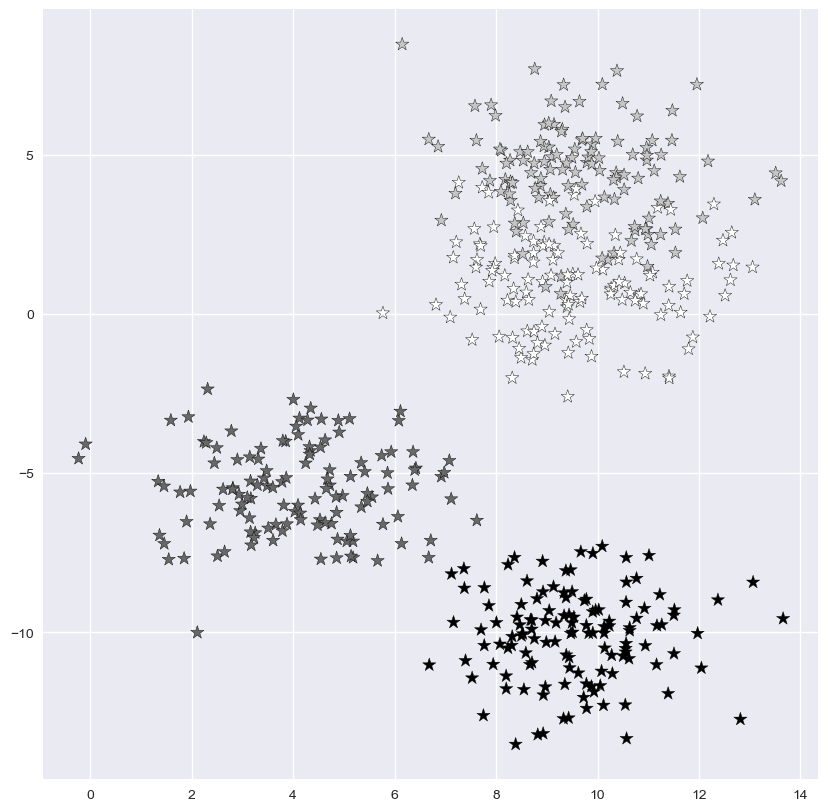

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 93.60000000000001
Accuracy with k=1 90.4


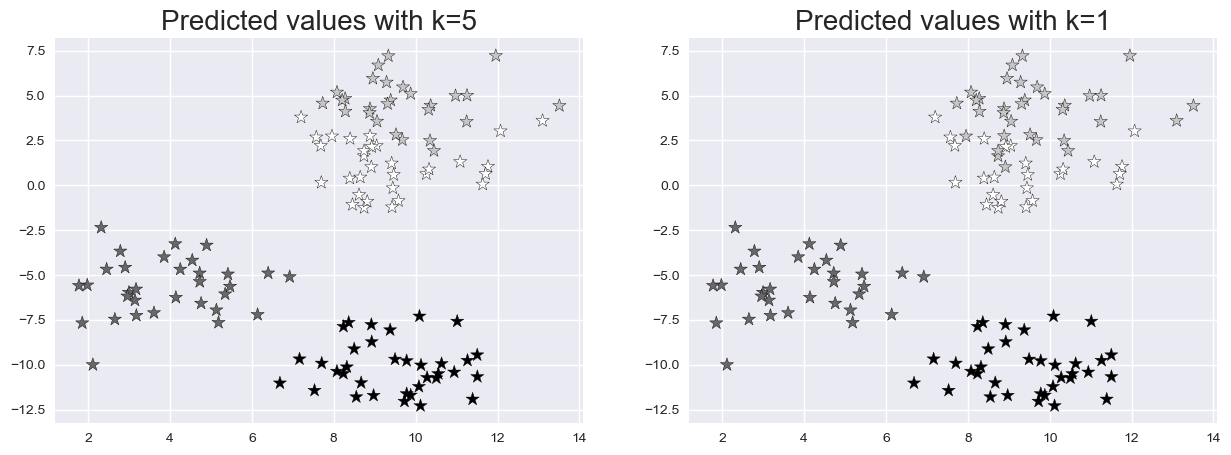

In [3]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

## References
**1.** Classic Machine Learning in Python: K-Nearest Neighbors (KNN)
Proximity-Based Predictions [PubMed](https://medium.com/@amirm.lavasani/classic-machine-learning-in-python-k-nearest-neighbors-knn-a06fbfaaf80a)


**2.** [https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/electrocardiogram ](https://www.digitalocean.com/community/tutorials/k-nearest-neighbors-knn-in-python#3-visualize-the-dataset)


**3.** The Elements of Stattistical Learning TibShirani.pdf


**4.** https://www.pinecone.io/learn/k-nearest-neighbor/
